### **라이브 불러오기**

In [26]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/75/7a/cad3b21a91cc55abe06f70146b564f20d9db2aee9631fdee580283bd5e1e/wordcloud-1.9.3-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.0 kB ? eta -:--:--
   ---------------------------------------- 300.0/300.0 kB 6.2 MB/s eta 0:00:00


In [38]:
!pip install konlpy

     ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
     -- ------------------------------------- 1.2/19.4 MB 26.4 MB/s eta 0:00:01
     ------ --------------------------------- 3.3/19.4 MB 29.8 MB/s eta 0:00:01
     ------------ --------------------------- 6.0/19.4 MB 29.6 MB/s eta 0:00:01
     ---------------- ----------------------- 8.0/19.4 MB 32.1 MB/s eta 0:00:01
     ---------------------- ---------------- 11.1/19.4 MB 32.7 MB/s eta 0:00:01
     ------------------------ -------------- 12.3/19.4 MB 31.2 MB/s eta 0:00:01
     ----------------------------- --------- 14.9/19.4 MB 31.2 MB/s eta 0:00:01
     -------------------------------- ------ 16.4/19.4 MB 31.2 MB/s eta 0:00:01
     ----------------------------------- --- 17.9/19.4 MB 29.7 MB/s eta 0:00:01
     --------------------------------------  19.4/19.4 MB 31.2 MB/s eta 0:00:01
     --------------------------------------- 19.4/19.4 MB 24.2 MB/s eta 0:00:00
  Obtaining dependency information for JPype1>=0

In [46]:
from bs4 import BeautifulSoup 
import requests
import pandas as pd
import os

In [2]:
url = "https://search.naver.com/search.naver?where=news&query=%EC%9A%B0%EC%9A%B8%EC%A6%9D&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds=2021.01.01&de=2021.12.31&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom20210101to20211231&is_sug_officeid=0&office_category=0&service_area=0"
res = requests.get(url)

In [4]:
soup = BeautifulSoup(res.text, 'html.parser')

In [5]:
soup2 = soup.find('div', class_ = 'group_news')

In [7]:
# li = soup2.find_all('li', class_ = 'bx')
# atag = li[1].find('a', class_ = 'news_tit')
# print(atag.text)
# print(atag.get('href'))

[기억할 오늘] 우울증의 고통에 공감한 귀한 의사
https://hankookilbo.com/News/Read/A2021122716040005345?did=NA


In [8]:
for li in soup2.find_all('li', class_ = 'bx') :
    atag = li.find('a', class_ = 'news_tit')
    print(atag.text)
    print(atag.get('href'))

뉴로라이브, 우울증 치료제 'NR-0601' 임상 1상 진입
https://www.hankyung.com/finance/article/2021123040086
[기억할 오늘] 우울증의 고통에 공감한 귀한 의사
https://hankookilbo.com/News/Read/A2021122716040005345?did=NA
원격 수업, 아이 우울증 위험 높인다 (연구)
https://kormedi.com/?p=1373380
"인삼·감태나무 추출물, 우울증·기억장애 개선 효능"
http://www.newsis.com/view/?id=NISX20211228_0001704055&cID=10201&pID=10200
폐경 여성, 우울증 있으면 ‘골다공증 위험’ 1.4배↑
http://www.segye.com/content/html/2021/12/28/20211228511504.html?OutUrl=naver
부산지법, 고도의 우울증으로 46년간 부양한 지적장애 및 시각장애 자녀 살해...
http://www.lawissue.co.kr/view.php?ud=2021123111020142059a8c8bf58f_12
자도 자도 피곤한 '수면장애'…질환이라는 인식가져야 고친다
http://news.mk.co.kr/newsRead.php?no=1223902&year=2021
우울증 심한 사람… '이것' 키우세요
https://health.chosun.com/site/data/html_dir/2021/12/27/2021122700968.html
버섯이 우울증 증상 줄여준다
http://www.cancerline.co.kr/html/24284.html
“인삼·감태나무 추출물, 우울증·기억장애 개선 효과”
http://www.segye.com/content/html/2021/12/29/20211229505142.html?OutUrl=naver


In [9]:
def crawl_article_content(url):
    try:
        res = requests.get(url)
        article_soup = BeautifulSoup(res.text, 'html.parser')
        content = article_soup.find('a', class_='api_txt_lines dsc_txt_wrap').get_text()
        return content
    except:
        return "기사 내용을 가져오는 데 실패했습니다."

def crawl_news_page(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    soup2 = soup.find('div', class_='group_news')

    for li in soup2.find_all('li', class_='bx'):
        atag = li.find('a', class_='news_tit')
        title = atag.text
        link = atag.get('href')
        content = crawl_article_content(link)

        print(title)
        print(link)
        print(content)
        print('--------------------------------')

# 10페이지 크롤링을 위한 URL 업데이트
base_url = "https://search.naver.com/search.naver?where=news&query=%EC%9A%B0%EC%9A%B8%EC%A6%9D&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds=2021.01.01&de=2021.12.31&start={}"

for page in range(1, 4):
    crawl_news_page(base_url.format(page * 10 - 9))


뉴로라이브, 우울증 치료제 'NR-0601' 임상 1상 진입
https://www.hankyung.com/finance/article/2021123040086
기사 내용을 가져오는 데 실패했습니다.
--------------------------------
[기억할 오늘] 우울증의 고통에 공감한 귀한 의사
https://hankookilbo.com/News/Read/A2021122716040005345?did=NA
기사 내용을 가져오는 데 실패했습니다.
--------------------------------
원격 수업, 아이 우울증 위험 높인다 (연구)
https://kormedi.com/?p=1373380
기사 내용을 가져오는 데 실패했습니다.
--------------------------------
"인삼·감태나무 추출물, 우울증·기억장애 개선 효능"
http://www.newsis.com/view/?id=NISX20211228_0001704055&cID=10201&pID=10200
기사 내용을 가져오는 데 실패했습니다.
--------------------------------
폐경 여성, 우울증 있으면 ‘골다공증 위험’ 1.4배↑
http://www.segye.com/content/html/2021/12/28/20211228511504.html?OutUrl=naver
기사 내용을 가져오는 데 실패했습니다.
--------------------------------
부산지법, 고도의 우울증으로 46년간 부양한 지적장애 및 시각장애 자녀 살해...
http://www.lawissue.co.kr/view.php?ud=2021123111020142059a8c8bf58f_12
기사 내용을 가져오는 데 실패했습니다.
--------------------------------
자도 자도 피곤한 '수면장애'…질환이라는 인식가져야 고친다
http://news.mk.co.kr/newsRead.php?no=1223902&year=2021
기사 내용을 가져오는 데 실패

In [15]:
from bs4 import BeautifulSoup
import requests

def get_news_links(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        news_items = soup.find_all('li', class_='bx')  # 뉴스 항목을 찾는 클래스

        links = []
        for item in news_items:
            atag = item.find('a', class_='news_tit')
            if atag:
                link = atag.get('href')
                links.append(link)
        return links
    except Exception as e:
        print(f"Error: {e}")
        return []

# 3페이지까지의 뉴스 링크를 수집합니다.
base_url = "https://search.naver.com/search.naver?where=news&query=%EC%9A%B0%EC%9A%B8%EC%A6%9D&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds=2021.01.01&de=2021.12.31&start={}"
all_links = []
for page in range(1, 11):
    page_links = get_news_links(base_url.format(page * 10 - 9))
    all_links.extend(page_links)

# 수집된 링크 출력
for link in all_links:
    print(link)


https://www.hankyung.com/finance/article/2021123040086
https://hankookilbo.com/News/Read/A2021122716040005345?did=NA
https://kormedi.com/?p=1373380
http://www.newsis.com/view/?id=NISX20211228_0001704055&cID=10201&pID=10200
http://www.segye.com/content/html/2021/12/28/20211228511504.html?OutUrl=naver
http://www.lawissue.co.kr/view.php?ud=2021123111020142059a8c8bf58f_12
http://news.mk.co.kr/newsRead.php?no=1223902&year=2021
https://health.chosun.com/site/data/html_dir/2021/12/27/2021122700968.html
http://www.cancerline.co.kr/html/24284.html
http://www.segye.com/content/html/2021/12/29/20211229505142.html?OutUrl=naver
http://www.cancerline.co.kr/html/24284.html
http://www.newsis.com/view/?id=NISX20211227_0001703163&cID=10601&pID=10600
https://www.newsen.com/news_view.php?uid=202112271510292410
http://www.hidoc.co.kr/healthstory/news/C0000659214
https://kormedi.com/?p=1373032
http://news.heraldcorp.com/view.php?ud=20211224000604
http://www.hidoc.co.kr/healthstory/news/C0000658979
http://ww

In [20]:
from bs4 import BeautifulSoup
import requests

url = "https://search.naver.com/search.naver?where=news&query=%EC%9A%B0%EC%9A%B8%EC%A6%9D&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds=2021.01.01&de=2021.12.31"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

titles = []
texts = []

# 제목과 관련된 텍스트 수집
for a_tag in soup.find_all('a', class_='news_tit'):
    titles.append(a_tag.get_text())

# 본문과 관련된 텍스트 수집
for a_tag in soup.find_all('a', class_='api_txt_lines dsc_txt_wrap'):
    texts.append(a_tag.get_text())

# 수집된 제목과 본문 텍스트 출력
for title, text in zip(titles, texts):
    print(f"Title: {title}")
    print(f"Text: {text}")
    print('--------------------------------')


Title: 뉴로라이브, 우울증 치료제 'NR-0601' 임상 1상 진입
Text: 바이오의약품 연구개발 전문 뉴로라이브가 우울증 치료제인 'NR-0601' 임상 1상에 진입했다고 30일 밝혔다. 뉴로라이브는 우울감 해소와 인지기능 향상에 초점을 둔 우울증 관련 파이프라인을 다수 보유하고 있다. 이번 'NR-0601'은 글루타메이트 수용체 작용제(NMDA)와 GSK 억제제(GSK inhibitor) 역할을 주로...
--------------------------------
Title: [기억할 오늘] 우울증의 고통에 공감한 귀한 의사
Text: "선생님은 이 병(우울증)을 몰라요..." 정신건강의학과 의사 고 임세원은 '죽고 싶은 사람은 없다'라는 책 첫머리에 환자들에게 종종 듣고 했다는 이 말을... 그는 물리적 통증과 우울증의 한밤 단상을 이렇게 썼다. "가족 모두가 아직 곤하게 자고 있는 새벽 세 시,(...) 작은 감각에도 예민해진다.(...) 늘 아프던 곳은...
--------------------------------
Title: 원격 수업, 아이 우울증 위험 높인다 (연구)
Text: 이번 연구 결과는 스마트폰, 컴퓨터 등 영상기기 사용 시간 증가가 아동 및 청소년의 우울증, 불안, 행동 장애, 주의력 문제와 관련이 있다는 것을... 조금 더 나이가 많은 평균 연령 11세 아이들의 경우 TV 시청 및 게임 시간이 늘어나면 우울증, 불안, 주의력 부족 문제가 나타날 확률이 높았다. 특히 이...
--------------------------------
Title: "인삼·감태나무 추출물, 우울증·기억장애 개선 효능"
Text: 일종)성분이 우울증을 개선시키고, 감태나무 추출물은 기억장애 개선에 효과가 있다는 연구 결과가 나왔다. 경희대한방병원 한방신경정신과 조성훈·김윤나 교수는 인삼과 감태나무 추출물에 대한 연구를 각각 진행한 결과 질환별 효능을 확인했다고 28일 밝혔다. 조 교수는 인삼의 항우울증 효과를...
------------------

In [22]:
def get_news_from_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    page_titles = []
    page_texts = []

    # 제목과 관련된 텍스트 수집
    for a_tag in soup.find_all('a', class_='news_tit'):
        page_titles.append(a_tag.get_text())

    # 본문과 관련된 텍스트 수집
    for a_tag in soup.find_all('a', class_='api_txt_lines dsc_txt_wrap'):
        page_texts.append(a_tag.get_text())

    return page_titles, page_texts

base_url = "https://search.naver.com/search.naver?where=news&query=%EC%9A%B0%EC%9A%B8%EC%A6%9D&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds=2021.01.01&de=2021.12.31&start={}"

titles = []
texts = []

# 10 페이지까지 반복
for page in range(1, 11):
    start = (page - 1) * 10 + 1
    page_url = base_url.format(start)
    page_titles, page_texts = get_news_from_page(page_url)
    titles.extend(page_titles)
    texts.extend(page_texts)
    
# 데이터프레임 생성 및 CSV 파일로 저장
df = pd.DataFrame({'title': titles, 'text': texts})
csv_file_path = 'news_data.csv'
df.to_csv(csv_file_path, index=False, encoding = 'ANSI')

# 수집된 제목과 본문 텍스트 출력
for title, text in zip(titles, texts):
    print(f"Title: {title}")
    print(f"Text: {text}")
    print('--------------------------------')


Title: 뉴로라이브, 우울증 치료제 'NR-0601' 임상 1상 진입
Text: 바이오의약품 연구개발 전문 뉴로라이브가 우울증 치료제인 'NR-0601' 임상 1상에 진입했다고 30일 밝혔다. 뉴로라이브는 우울감 해소와 인지기능 향상에 초점을 둔 우울증 관련 파이프라인을 다수 보유하고 있다. 이번 'NR-0601'은 글루타메이트 수용체 작용제(NMDA)와 GSK 억제제(GSK inhibitor) 역할을 주로...
--------------------------------
Title: [기억할 오늘] 우울증의 고통에 공감한 귀한 의사
Text: "선생님은 이 병(우울증)을 몰라요..." 정신건강의학과 의사 고 임세원은 '죽고 싶은 사람은 없다'라는 책 첫머리에 환자들에게 종종 듣고 했다는 이 말을... 그는 물리적 통증과 우울증의 한밤 단상을 이렇게 썼다. "가족 모두가 아직 곤하게 자고 있는 새벽 세 시,(...) 작은 감각에도 예민해진다.(...) 늘 아프던 곳은...
--------------------------------
Title: 원격 수업, 아이 우울증 위험 높인다 (연구)
Text: 이번 연구 결과는 스마트폰, 컴퓨터 등 영상기기 사용 시간 증가가 아동 및 청소년의 우울증, 불안, 행동 장애, 주의력 문제와 관련이 있다는 것을... 조금 더 나이가 많은 평균 연령 11세 아이들의 경우 TV 시청 및 게임 시간이 늘어나면 우울증, 불안, 주의력 부족 문제가 나타날 확률이 높았다. 특히 이...
--------------------------------
Title: "인삼·감태나무 추출물, 우울증·기억장애 개선 효능"
Text: 일종)성분이 우울증을 개선시키고, 감태나무 추출물은 기억장애 개선에 효과가 있다는 연구 결과가 나왔다. 경희대한방병원 한방신경정신과 조성훈·김윤나 교수는 인삼과 감태나무 추출물에 대한 연구를 각각 진행한 결과 질환별 효능을 확인했다고 28일 밝혔다. 조 교수는 인삼의 항우울증 효과를...
------------------

### **파이썬 버전 확인**

In [23]:
import sys

python_version = sys.version

python_version

'3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:15:57) [MSC v.1916 64 bit (AMD64)]'

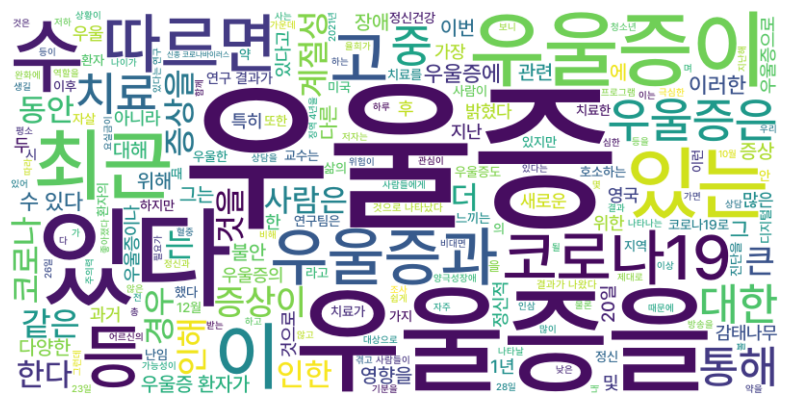

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# news_data 데이터셋 로드
news_data = pd.read_csv('news_data.csv', encoding='ANSI')

# 'text' 컬럼의 모든 텍스트를 하나의 문자열로 결합
all_text = ' '.join(news_data['text'])

# 워드 클라우드 생성
wordcloud = WordCloud(font_path='C:\\Users\\Gong\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Pretendard-Medium.otf',
                      width=800, height=400, background_color='white').generate(all_text)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [40]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_news_from_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    page_titles = []
    page_texts = []

    # 제목과 관련된 텍스트 수집
    for a_tag in soup.find_all('a', class_='news_tit'):
        page_titles.append(a_tag.get_text())

    # 본문과 관련된 텍스트 수집
    for a_tag in soup.find_all('a', class_='api_txt_lines dsc_txt_wrap'):
        page_texts.append(a_tag.get_text())

    return page_titles, page_texts

base_url = "https://search.naver.com/search.naver?where=news&query=%EC%9A%B0%EC%9A%B8%EC%A6%9D&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds=2021.01.01&de=2021.12.31&start={}"

titles = []
texts = []

# 10 페이지까지 반복
for page in range(1, 11):
    start = (page - 1) * 10 + 1
    page_url = base_url.format(start)
    page_titles, page_texts = get_news_from_page(page_url)
    titles.extend(page_titles)
    texts.extend(page_texts)

# .txt 파일로 저장
txt_file_path = 'news_data.txt'
with open(txt_file_path, 'w', encoding='ANSI') as file:
    for title, text in zip(titles, texts):
        file.write(f"Title: {title}\n")
        file.write(f"Text: {text}\n")
        file.write('--------------------------------\n')
